/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


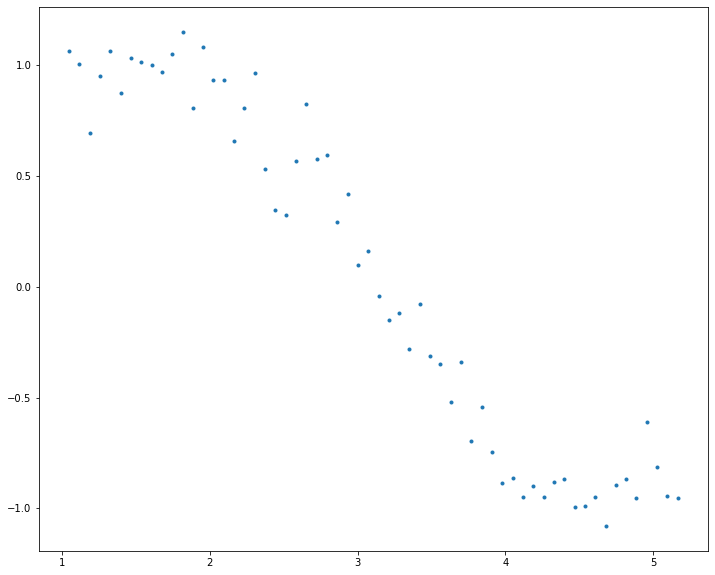

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as pl
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
pl.plot(data['x'],data['y'],'.')

In [3]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.head())

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.006086  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.695374  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.949799  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.063496  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

def ridge_regression(data, predictors, alpha, models_to_plot={}):
    
    #Train test split
    X_train, X_test, y_train, y_test = train_test_split(data[predictors], data['y'], 
                                                        test_size=0.2, random_state=42)
    
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(X_train,y_train)
    y_pred_train = ridgereg.predict(X_train)
    y_pred_test = ridgereg.predict(X_test)
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        pl.subplot(models_to_plot[alpha])
        pl.tight_layout()
        pl.plot(X_train['x'],y_pred_train,'ro')
        pl.plot(data['x'],data['y'],'.')
        pl.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss_train = sum((y_pred_train-y_train)**2)/y_train.size
    rss_test  = sum((y_pred_test-y_test)**2)/y_test.size
    ret = [rss_train]
    ret.extend([rss_test])
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

/home/riccardo/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.97962e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  

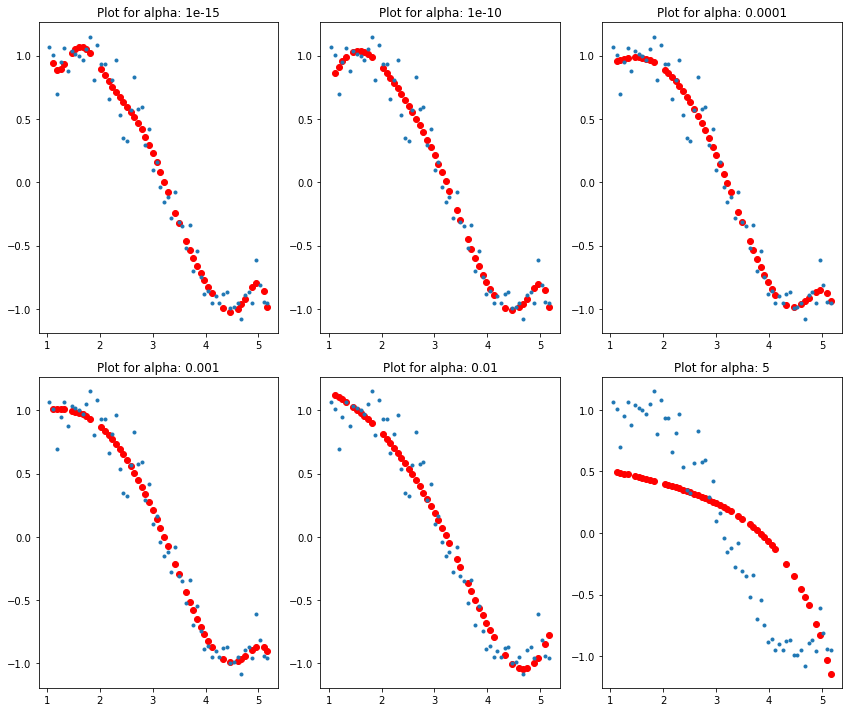

In [11]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss_train','rss_test','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [12]:
coef_matrix_ridge

,rss_train,rss_test,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.016269,0.008514,112.820445,-364.908863,477.46112,-314.675725,102.03468,-8.544226,-3.561312,0.517994,0.201253,-0.043964,-0.003373,0.001105,0.000086,-0.00003,0.000001,0.0
alpha_1e-10,0.0169,0.014714,1.666415,-6.729849,11.500314,-7.513517,1.867124,0.032718,-0.064079,-0.004943,0.001762,0.000419,0.0,-0.000016,-0.000003,0.0,0.0,-0.0
alpha_1e-08,0.017083,0.015257,-2.34169,5.439567,-2.769746,0.364479,0.061438,-0.008608,-0.002745,-0.000108,0.000066,0.000014,0.000001,-0.0,-0.0,0.0,0.0,-0.0
alpha_0.0001,0.017875,0.008749,0.464906,0.650452,-0.158188,-0.02555,-0.002217,-0.000034,0.000038,0.000012,0.000003,0.000001,0.0,0.0,0.0,0.0,-0.0,-0.0
alpha_0.001,0.018576,0.008777,0.774462,0.341165,-0.091331,-0.021092,-0.002864,-0.000216,0.000019,0.000013,0.000003,0.000001,0.0,0.0,0.0,-0.0,-0.0,-0.0
alpha_0.01,0.025947,0.014929,1.286331,-0.072004,-0.052865,-0.010511,-0.001471,-0.000136,0.000001,0.000004,0.000001,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0
alpha_1,0.093346,0.094965,0.989443,-0.141604,-0.019529,-0.003018,-0.000462,-0.000068,-0.00001,-0.000001,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
alpha_5,0.221553,0.27312,0.574225,-0.059726,-0.008595,-0.00142,-0.000239,-0.00004,-0.000007,-0.000001,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
alpha_10,0.286607,0.36801,0.432168,-0.037699,-0.005566,-0.000949,-0.000166,-0.000029,-0.000005,-0.000001,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
alpha_20,0.359453,0.472518,0.315297,-0.022712,-0.003426,-0.000599,-0.000108,-0.000019,-0.000004,-0.000001,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


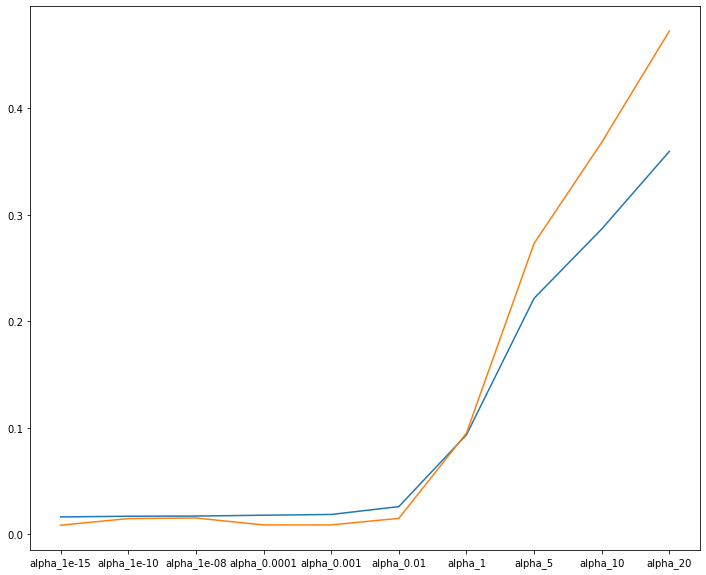

In [14]:
pl.plot(coef_matrix_ridge['rss_train'])
pl.plot(coef_matrix_ridge['rss_test'])